
In this project, I will be working with the [California Communities Environmental Health Screening Tool (CalEnviroScreen)](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30), which uses demographic and environmental information to identify communities that are susceptible to various types of pollution. The variables in this dataset contribute to the CES score, which reflects a community's environmental conditions and its vulnerability to environmental pollutants. I will be using decision tree methods to predict the CES scores of different census tracts in the state of California.

In [ ]:
import pandas as pd
import numpy as np

import graphviz

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename = 'ces3results.xlsx'
xl = pd.ExcelFile(filename)
print(xl.sheet_names) # display a list of the sheets in the spreadsheet

['CES3.0FINAL_results', 'Data Dictionary', 'Missing&NAData', 'Demographic profile']


First I load the first sheet of the Excel file

In [ ]:
df = xl.parse(xl.sheet_names[0]) # display the first sheet as a Pandas dataframe
df.head()

,Census Tract,Total Population,California County,ZIP,City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.089387,100.000000,96-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553440,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677825,99.987388,96-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067783,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.968804,99.974776,96-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808662,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.490978,99.962164,96-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991455,97.729852
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030324,99.949552,96-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304296,92.773364


The CES categories and the variable names can be found on the second page of [this fact sheet](https://oehha.ca.gov/media/downloads/calenviroscreen/fact-sheet/ces30factsheetfinal.pdf).


I take a look at the data for the city of Berkeley. Find all instances that Berkeley appears in the dataset and assign it to the variable `berkeley`. Then, select the columns `Census Tract`, `ZIP`, `CES 3.0 Score`, `CES 3.0 Percentile Score`, `Housing Burden`, `Poverty`, `Traffic`, `Groundwater Threats`, `Pollution Burden`, and `Drinking Water`.


In [ ]:
berkeley = df[df['City'] == 'Berkeley'].dropna()
berkeley = berkeley[['Census Tract', 'ZIP', 'CES 3.0 Score', 'CES 3.0 \nPercentile Range',
                        'Housing Burden', 'Poverty','Traffic', 'Groundwater Threats', 'Pollution Burden',
                        'Drinking Water']]
berkeley.head(10)

,Census Tract,ZIP,CES 3.0 Score,CES 3.0 \nPercentile Range,Housing Burden,Poverty,Traffic,Groundwater Threats,Pollution Burden,Drinking Water
1905,6001422000,94710,39.951350,76-80%,8.8,41.5,2443.10,236.00,58.519327,70.599583
2361,6001423200,94710,36.091186,71-75%,22.9,42.3,517.07,56.55,44.962177,70.599583
3129,6001424002,94702,30.552611,61-65%,23.7,37.1,551.54,49.30,44.040946,70.599583
3288,6001422100,94710,29.538834,56-60%,24.8,27.5,489.20,70.80,46.131570,70.599583
3536,6001423100,94702,27.744060,56-60%,23.0,30.5,536.16,33.50,42.770954,70.599583
3659,6001422200,94702,26.966131,51-55%,20.6,27.0,506.81,33.80,40.264766,70.599583
4081,6001423300,94702,24.346142,46-50%,19.5,28.6,550.39,55.10,44.664415,70.599583
4127,6001423400,94703,24.135257,46-50%,23.8,30.5,682.35,17.80,37.471131,70.599583
4247,6001420400,94710,23.522346,46-50%,43.7,51.2,2378.83,39.65,50.732530,70.599583
4456,6001422900,94704,22.377374,41-45%,38.1,63.1,730.08,24.75,34.815446,70.599583


Here is a short description of some of the data


**Housing Burden**  <br>
Measurement:   Percent of households in a census tract that making less than 80% of the HUD Area Median Family Income) and paying greater than 50% of their income to housing costs     <br>
Data source:   Housing and Urban Development Comprehensive Housing Affordability Strategy American Community Survey
US Census Bureau     <br>
Relevance: Housing cost burden accounts for differences in rent or homeowner costs across different areas of California

**Traffic**        <br>
Measurement:  Sum of traffic volumes adjusted by vehicle-kilometers per hour divided by total road length (kilometers) within 150 meters of the census tract boundary     <br>
Data source: California Environmental Health Tracking Program (CEHTP), California Department of Public Health US Department of Transportation and US Customs and Border Protection San Diego Association of Governments (SANDAG)      <br>
Relevance: Traffic density is used to represent the number of mobile sources in a specified area, resulting in human exposures to chemicals that are released into the air by vehicle exhaust, as well as other effect related to large concentrations of motor vehicles

**Drinking Water** <br>
Measurement: Drinking water contaminant index for selected contaminants         <br>
Data source: Drinking Water Systems Geographic Reporting Tool, California Environmental Health Tracking Program         <br>
Relevance: The amount of contaminants communities are exposed to is correlated with their income range

In [ ]:
ind1 = berkeley[berkeley['Census Tract'] == 6001421100.0]
ind2 = berkeley[berkeley['Census Tract'] == 6001422000.0]
ind1.append(ind2)

,Census Tract,ZIP,CES 3.0 Score,CES 3.0 \nPercentile Range,Housing Burden,Poverty,Traffic,Groundwater Threats,Pollution Burden,Drinking Water
7920,6001421100,94708,1.473015,1-5% (lowest scores),11.7,7.9,264.93,0.0,15.788499,70.599583
1905,6001422000,94710,39.951350,76-80%,8.8,41.5,2443.10,236.0,58.519327,70.599583


These two communities are extremely different -- one has an extremely low score and one has a high score, and the values in the features are also pretty varied. I take a look at where their scores lie in various histograms of the features by plotting a distribution for the `Poverty` variable of all Berkeley tracts as well as for `Pollution Burden`. Along with these histograms, I plot the points in which these two tracts lie within the distribution.

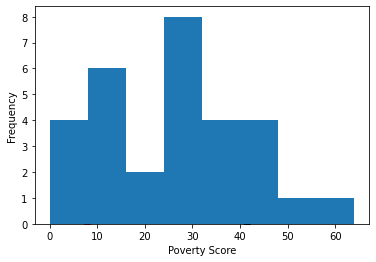

In [ ]:
# Poverty burden histogram
plt.hist(berkeley['Poverty'], bins=np.arange(0, 71, 8))
plt.scatter(ind1['Poverty'].values, y=0, c='r', s=30)
plt.scatter(ind2['Poverty'].values, y=0, c='black', s=30)
plt.xlabel('Poverty Score')
plt.ylabel('Frequency');

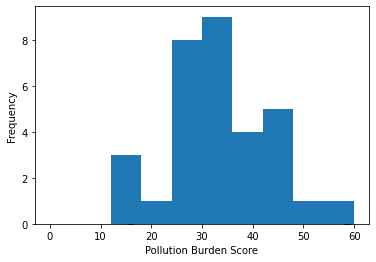

In [ ]:
# Pollution burden histogram
plt.hist(berkeley['Pollution Burden'], bins=np.arange(0, 61, 6))
plt.scatter(ind1['Pollution Burden'].values, y=0, c='r', s=30)
plt.scatter(ind2['Pollution Burden'].values, y=0, c='black', s=30)
plt.xlabel('Pollution Burden Score')
plt.ylabel('Frequency');

Lastly, I take a look at the demographic profiles of these two communities.


In [ ]:
dp = xl.parse('Demographic profile')
dp = dp.rename(columns = {'Census Tract ': 'Census Tract',
                          'Age group from 2010 Census (%)':'Children < 10 (%)',
                          'Unnamed: 7':'Pop 11-64 years (%)',
                          'Unnamed: 8':'Elderly > 65 (%)',
                          'Race or ethnicity from 2010 Census (%)':'Hispanic (%)',
                          'Unnamed: 10':'White (%)',
                          'Unnamed: 11':'African American (%)',
                          'Unnamed: 12': 'Native American (%)',
                          'Unnamed: 13':'Asian American (%)',
                          'Unnamed: 14': 'Other (%)'})

demo1 = dp[dp['Census Tract'] == 6001421100.0]
demo2 = dp[dp['Census Tract'] == 6001422000.0]
demo  = demo1.append(demo2)
demo

,Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,Total Population,California \nCounty,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%)
7921,6.001421e+09,1.473015,0.113507,1-5% (lowest scores),1992.0,Alameda,9.5,63.3,27.2,5,76.5,1.8,0,12,4.6
1906,6.001422e+09,39.951350,75.974272,76-80%,1756.0,Alameda,9.1,82.5,8.4,12.6,43.3,28,0.2,10,5.9


----

## 2. A Decision Tree From Scratch <a name = 'scratch'></a>




First, I take a very small subset of our data so that our tree will be easy to work with.

In [ ]:
data = df.rename(columns={'CES 3.0 \nPercentile Range':'CES 3.0 Percentile Range'})

top = data[data['CES 3.0 Percentile Range'] == '96-100% (highest scores)'].index
bottom = data[data['CES 3.0 Percentile Range'] == '1-5% (lowest scores)'].index

sample = data.iloc[top.append(bottom)]
sample = sample.dropna().loc[:,["Groundwater Threats", "Drinking Water",
                                "CES 3.0 Percentile Range"]].sample(20, random_state=1)
sample = sample.reset_index(drop=True)
sample_test = sample[:int(0.2*len(sample))]
sample_train = sample[int(0.2*len(sample)):]
print('Test Set Sample')
print(sample_test)
print('Training Set Sample')
print(sample_train)

Test Set Sample
   Groundwater Threats  Drinking Water  CES 3.0 Percentile Range
0                  0.0      204.133310      1-5% (lowest scores)
1                  1.5       70.599583      1-5% (lowest scores)
2                 24.0      681.195604  96-100% (highest scores)
3                  4.0      664.069078  96-100% (highest scores)
Training Set Sample
    Groundwater Threats  Drinking Water  CES 3.0 Percentile Range
4                  5.00       67.043782      1-5% (lowest scores)
5                  4.25      644.868868  96-100% (highest scores)
6                 15.00      495.257331  96-100% (highest scores)
7                  0.00      437.425659      1-5% (lowest scores)
8                  6.00      835.976652  96-100% (highest scores)
9                  0.75      557.338833  96-100% (highest scores)
10                45.50      302.334537      1-5% (lowest scores)
11                16.00      479.227886      1-5% (lowest scores)
12                 4.00     1145.749098      

Using this sample data, I will build a decision tree from scratch.

The first thing we want to do when we building a tree is to determine where to split the tree into branches. To do so, I calculate the Gini index.




In [ ]:
def gini_index(groups_classified, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups_classified]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups_classified:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

I test the function `gini_index`. I assume that we have a branch that separates the data into two groups. All data is classified as either 0 or 1. In the first line of code in the following cell, both groups have 2 data points, one that is class 0 and the other is class 1. This split represents the worst purity and the calculated Gini index is 0.5. In contrast, the second line of code, shows the first group to have two points both classified as 0 and the second group has two points both classified as 1. This is an ideal split were each group contains all data points of one class and no data points of any other class. This has the optimal Gini index of 0.

In [ ]:
print(gini_index([[1, 0], [1, 0]], [0, 1]))
print(gini_index([[0, 0], [1, 1]], [0, 1]))

0.5
0.0


The Gini index can be used for problems with more than two classes. I consider a 3 class problem (classes 0, 1, and 2) with 10 data points (3 points of class 1, 3 points of class 2, and 4 points of class 3). I divide the data into 3 groups. First, I divide the data points in an optimal way to minimize the Gini index. Next, I divide the data in the least optimal manner to generate the highest Gini index. For each of these groupings, I use the function `gini_index` to calculate the Gini index.

In [ ]:
print('Optimal Grouping Gini Index:')
print(gini_index([[0,0,0],[1,1,1],[2,2,2,2]],[0, 1, 2]))
print('Least Optimal Grouping Gini Index:')
print(gini_index([[0,1,2],[0,1,2],[0,1,2,1]],[0, 1, 2]))

Optimal Grouping Gini Index:
0.0
Least Optimal Grouping Gini Index:
0.65


Here, we I split is comprised of an attribute in the dataset and a value on which that attribute should be split. I try splitting the data on all attributes and all values (within the training data set) and, ultimately, select the split that minimizes the Gini index.


In [ ]:
def test_split(attribute, value, dataset):
    left, right = list(), list()
    for row in dataset.index:
        if dataset.at[row, attribute] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

 Given a dataset, I check every value of each attribute as a candidate split, evaluate the cost of the split and find the best possible split that could be made. The split that results in the lowest Gini index would then be chosen as the best split and a node would be created.

 I use a dictionary to represent a node in the decision tree. When selecting the best split and using it as a new node for the tree, I will store the chosen attribute, the value of that attribute by which to split, and the two groups of data created by the chosen split.



In [ ]:
def get_split(dataset, predictive_class):
    gini_past = 1000
    for col in dataset.columns:
        if col != predictive_class:
            for i in dataset.index:
                left, right = test_split(col, float(dataset.loc[i,[col]]), dataset)
                a = dataset.loc[left,predictive_class]
                b = dataset.loc[right,predictive_class]
                c = dataset[predictive_class]
                gini = gini_index([a.values.tolist(),b.values.tolist()], c.values.tolist())
                if gini < gini_past:
                    best_attribute = col
                    best_value = dataset.loc[i,col]
                    best_groups_indices = [left,right]
                    best_groups_classified = [a.values.tolist(),b.values.tolist()]
                    gini_past = gini
                    best_index = i

    return {'attribute':best_attribute, 'value':best_value,  'groups_indices': best_groups_indices, 'groups_classified':best_groups_classified}

## To test that `get_split` is working properly, I run the following to find the optimal split on the sample_train dataset.

In [ ]:
dataset = sample_train
predictive_class = 'CES 3.0 Percentile Range'
get_split(dataset, predictive_class)

{'attribute': 'Drinking Water',
 'value': 495.2573305,
 'groups_indices': [[4, 7, 10, 11, 14, 15, 17, 18],
  [5, 6, 8, 9, 12, 13, 16, 19]],
 'groups_classified': [['1-5% (lowest scores)',
   '1-5% (lowest scores)',
   '1-5% (lowest scores)',
   '1-5% (lowest scores)',
   '1-5% (lowest scores)',
   '96-100% (highest scores)',
   '1-5% (lowest scores)',
   '1-5% (lowest scores)'],
  ['96-100% (highest scores)',
   '96-100% (highest scores)',
   '96-100% (highest scores)',
   '96-100% (highest scores)',
   '1-5% (lowest scores)',
   '96-100% (highest scores)',
   '96-100% (highest scores)',
   '1-5% (lowest scores)']],
 'index': 6}

I build the tree using a split function based on the following conditions:

i - I check if the left or right groups of a node are empty; if so, it makes the node a terminal node

ii - I check if the current node is deeper than the maximum tree depth; if so it makes the node a leaf

iii - I check if the group of rows in the current node is too small, if so make the left node a leaf; if not, splits the left node

iv - I check if the group of rows is too small, if so make the right node a leaf; if not, splits the right node

In [ ]:
# Create a terminal node value
def to_terminal(group):
    outcomes = [row for row in group]
    return max(set(outcomes), key=outcomes.count)


def split(node, max_depth, min_size, depth, dataset, predictive_class):
    left_indices, right_indices = node['groups_indices']
    left_classifications, right_classifications = node['groups_classified']
    del(node['groups_indices'])
    del(node['groups_classified'])
    ### A ###
    if not left_classifications or not right_classifications:
        node['left'] = node['right'] = to_terminal(left_classifications + right_classifications)
        return
    ### B ###
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left_classifications), to_terminal(right_classifications)
        return
    ### C ###
    if len(left_classifications) <= min_size:
        node['left'] = to_terminal(left_classifications)
    else:
        node['left'] = get_split(dataset.loc[left_indices, :],predictive_class)
        split(node['left'], max_depth, min_size, depth+1, dataset, predictive_class)
    ### D ###
    if len(right_classifications) <= min_size:
        node['right'] = to_terminal(right_classifications)
    else:
        node['right'] = get_split(dataset.loc[right_indices, :],predictive_class)
        split(node['right'], max_depth, min_size, depth+1, dataset, predictive_class)
    ###

Building the tree involves creating the root node and calling the `split()` function that then calls itself recursively to build out the whole tree. The `build_tree` function does this procedure.

In [ ]:
# Build a decision tree
def build_tree(train, predictive_class, max_depth, min_size):
    root = get_split(train, predictive_class)
    split(root, max_depth, min_size, 1, dataset, predictive_class)
    return root

Here I see what a simple tree would look like using the sample_train dataset. I choose a max_depth of 3 and a min_size of 2.

In [ ]:
dataset = sample_train
predictive_class = 'CES 3.0 Percentile Range'
max_depth = 4
min_size = 2
build_tree(dataset, predictive_class, max_depth, min_size)

{'attribute': 'Drinking Water',
 'value': 495.2573305,
 'index': 6,
 'left': {'attribute': 'Groundwater Threats',
  'value': 8.55,
  'index': 15,
  'left': {'attribute': 'Groundwater Threats',
   'value': 5.0,
   'index': 4,
   'left': {'attribute': 'Groundwater Threats',
    'value': 0.0,
    'index': 7,
    'left': '1-5% (lowest scores)',
    'right': '1-5% (lowest scores)'},
   'right': '1-5% (lowest scores)'},
  'right': {'attribute': 'Groundwater Threats',
   'value': 16.0,
   'index': 11,
   'left': '96-100% (highest scores)',
   'right': '1-5% (lowest scores)'}},
 'right': {'attribute': 'Drinking Water',
  'value': 1145.749098,
  'index': 12,
  'left': {'attribute': 'Groundwater Threats',
   'value': 4.25,
   'index': 5,
   'left': {'attribute': 'Groundwater Threats',
    'value': 3.0,
    'index': 19,
    'left': '96-100% (highest scores)',
    'right': '1-5% (lowest scores)'},
   'right': {'attribute': 'Groundwater Threats',
    'value': 4.25,
    'index': 5,
    'left': '96-1

An alternative way to view the decision tree

In [ ]:
# Print a decision tree
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[%s < %.2f]' % ((depth*' ', (node['attribute']), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

In [ ]:
dataset = sample_train
predictive_class = 'CES 3.0 Percentile Range'
max_depth = 4
min_size = 2
tree = build_tree(dataset, predictive_class, max_depth, min_size)
print_tree(tree)

[Drinking Water < 495.26]
 [Groundwater Threats < 8.55]
  [Groundwater Threats < 5.00]
   [Groundwater Threats < 0.00]
    [1-5% (lowest scores)]
    [1-5% (lowest scores)]
   [1-5% (lowest scores)]
  [Groundwater Threats < 16.00]
   [96-100% (highest scores)]
   [1-5% (lowest scores)]
 [Drinking Water < 1145.75]
  [Groundwater Threats < 4.25]
   [Groundwater Threats < 3.00]
    [96-100% (highest scores)]
    [1-5% (lowest scores)]
   [Groundwater Threats < 4.25]
    [96-100% (highest scores)]
    [96-100% (highest scores)]
  [1-5% (lowest scores)]


### Now I test how well the tree constructed above predicts the class for the sample_test dataset, and find the classification error rate.

In [ ]:


def predict(node, row):
    if dataset.at[row, node['attribute']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

prediction = []
for row in dataset:
    prediction.append(predict(tree, row))

print(accuracy_metric(dataset['CES 3.0 Percentile Range'].values.tolist(),prediction))

Now I try using scikit-learn in building the tree


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

We consider the top 10% and bottom 10% of the data based on the CES 3.0 Percentile Range.

In [ ]:
pct90 = data[data['CES 3.0 Percentile Range'] > '9'].index

bottom = data[data['CES 3.0 Percentile Range'] == '1-5% (lowest scores)'].index
bottom2 = data[data['CES 3.0 Percentile Range'] == '6-10%'].index
pct10 = bottom.append(bottom2)

data_top_bottom_decile = data.loc[pct90.append(pct10)]

assert len(data_top_bottom_decile['CES 3.0 Percentile Range'].unique()) == 4

Now I filter through the certain features I want to use in the classification tree.

In [ ]:
data_top_bottom_decile = data_top_bottom_decile.drop(columns = ['Census Tract', 'CES 3.0 Score', ' CES 3.0 Percentile',
                            'California County', 'ZIP', 'City', 'Longitude', 'Latitude'])
data_top_bottom_decile = data_top_bottom_decile.dropna()
data_top_bottom_decile.head()

,Total Population,CES 3.0 Percentile Range,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,3174,96-100% (highest scores),0.064889,98.182950,15.40,97.218064,48.523809,95.544493,681.195604,80.915554,...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553440,99.697314
1,6133,96-100% (highest scores),0.062163,91.101431,13.31,93.637725,38.556339,92.121966,904.657603,96.108270,...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067783,98.108210
2,3167,96-100% (highest scores),0.062163,91.101431,15.40,97.218064,47.445208,95.420037,681.195604,80.915554,...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808662,99.987388
3,6692,96-100% (highest scores),0.046178,53.018046,12.54,84.019461,24.117036,73.515868,278.756235,29.113135,...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991455,97.729852
4,2206,96-100% (highest scores),0.064889,98.182950,15.40,97.218064,18.845944,58.220286,1000.240794,98.640389,...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304296,92.773364


 From the data, there are two columns for each attribute (for example 'Ozone' and 'Ozone Pctl'). The 'Pctl' refers to which percentile the raw value for the attribute falls. I only want to consider the raw data, so I will remove all columns with 'Pctl'. I also need to remove the predicted variable (target), 'CES 3.0 Percentile Range'. The remaining columns are the features that will be used to build the decision tree.

In [ ]:
drop_columns = [i for i in data_top_bottom_decile.columns if 'Pctl' in i]
drop_columns.append('CES 3.0 Percentile Range')

features = data_top_bottom_decile.drop(columns=drop_columns)
target = data_top_bottom_decile['CES 3.0 Percentile Range']

Now I create the training, testing, and validation sets. An 80/20 split to get the test data, and a 75/25 split on the remaining data to get the train/validation split.

In [ ]:
# split test set
X, X_test, y, y_test = train_test_split(features, target, random_state = 1, test_size = .2)

# split between train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 1, test_size = 0.25)

Here I create a tree model using the `DecisionTreeClassifer` function and call it `first_tree`. Then I fit the model using the training data, and score it using both the training and validation set. Lastly I assign the scores to the variables `train_score` and `val_score` respectively.

In [ ]:
first_tree = DecisionTreeClassifier()
first_tree.fit(X_train, y_train)

print("Number of features: {}".format(first_tree.tree_.n_features))
print("Number of nodes (leaves): {}".format(first_tree.tree_.node_count), "\n")

train_score = first_tree.score(X_train, y_train)
val_score = first_tree.score(X_val, y_val)

print('Train Score: ', train_score)
print('Validation Score: ', val_score)

Number of features: 25
Number of nodes (leaves): 117 

Train Score:  1.0
Validation Score:  0.8929765886287625


Code to visualize the trees

In [ ]:
tree.export_graphviz(first_tree, 'first_tree.dot', feature_names = X.columns)
! dot -Tpng first_tree.dot -o first_tree.png

I check the feature importances to determine what features are most important for predicting the CES scores

In [ ]:
pd.DataFrame({'Feature': X.columns, 'Importance': first_tree.feature_importances_}).sort_values(by ='Importance', ascending = False)

,Feature,Importance
24,Pop. Char. Score,0.536616
13,Pollution Burden,0.138164
14,Pollution Burden Score,0.132851
23,Pop. Char.,0.122389
20,Poverty,0.009123
6,Tox. Release,0.007006
18,Education,0.006942
8,Cleanup Sites,0.005239
15,Asthma,0.005117
7,Traffic,0.004730



Now I try a few sets of different values for the two parameters (max leaf nodes and max features) and see how much I can improve the accuracy of the original model.

In [ ]:
tuned_tree = DecisionTreeClassifier(max_leaf_nodes=200, max_features=18)
tuned_tree.fit(X_train, y_train)

print("Number of features: {}".format(tuned_tree.tree_.n_features))
print("Number of nodes (leaves): {}".format(tuned_tree.tree_.node_count),"\n")

tuned_train_score = tuned_tree.score(X_train, y_train)
tuned_val_score = tuned_tree.score(X_val, y_val)

print('Train Score: ', tuned_train_score)
print('Validation Score: ', tuned_val_score)

Number of features: 25
Number of nodes (leaves): 123 

Train Score:  1.0
Validation Score:  0.8929765886287625




Now I do an exhaustive parameter search using `RandomizedSearchCV` to determine the optimal parameters for the tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_leaf_nodes': randint(3, 100),
              'max_features': randint(2, 25),
              'max_depth': randint(1, 10)}

rnd_search = RandomizedSearchCV(tuned_tree, param_distributions=param_dist,
                                cv=10, n_iter=200)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(max_features=18,
                                                    max_leaf_nodes=200),
                   n_iter=200,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2aba2a301f40>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2aba23d98b80>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2aba2a301190>})

After fitting our data, I check the score and the values for the parameters that return the "best" score.

In [ ]:
print(rnd_search.best_score_)
best_params = rnd_search.best_params_
print(best_params)

0.8916978776529338
{'max_depth': 8, 'max_features': 20, 'max_leaf_nodes': 91}


Now I set the parameters of the tuned tree to the ones found using the randomized search. Then, I score the model using the training and validation sets.

In [ ]:
tuned_tree.set_params(max_features=best_params['max_features'], max_leaf_nodes=best_params['max_leaf_nodes'])
tuned_tree.fit(X_train, y_train)

tuned_train_score = tuned_tree.score(X_train, y_train)
tuned_val_score = tuned_tree.score(X_val, y_val)

print('Train Score: ', tuned_train_score)
print('Validation Score: ', tuned_val_score)

Train Score:  1.0
Validation Score:  0.8963210702341137


\I print out the feature scores to observe feature importance to determine the most important features in the data set.

In [ ]:
pd.DataFrame({'Feature':X_train.columns, 'Importance': tuned_tree.feature_importances_}).sort_values(by = 'Importance', ascending = False)

,Feature,Importance
24,Pop. Char. Score,0.560009
13,Pollution Burden,0.224575
23,Pop. Char.,0.112916
14,Pollution Burden Score,0.049355
7,Traffic,0.007204
19,Linguistic Isolation,0.007051
18,Education,0.006682
6,Tox. Release,0.006214
0,Total Population,0.005591
8,Cleanup Sites,0.005518


Lastly, for this tuned tree, let's take a look at how adjusting the hyperparameters altered the decision tree using graphviz to visualize the tree.

In [ ]:
tree.export_graphviz(tuned_tree, 'tuned_tree.dot', feature_names = X.columns)
! dot -Tpng tuned_tree.dot -o tuned_tree.png

Next I try cost complexity pruning to reduce the size of the tree and reduce overfitting

In [ ]:
pruned_tree = DecisionTreeClassifier()
path = pruned_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

For each value of the cost complexity parameter, ccp_alpha, I train a decision tree.

In [ ]:
pruned_trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)

I Visualize the effect of the cost complexity parameter on the number of nodes and depth of the pruned decision trees.

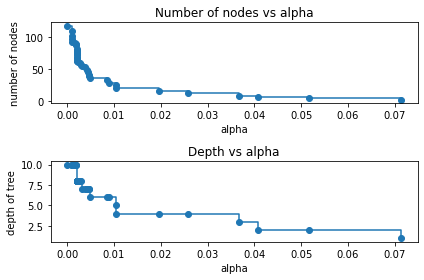

In [ ]:
pruned_trees = pruned_trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [pruned_tree.tree_.node_count for pruned_tree in pruned_trees]
depth = [pruned_tree.tree_.max_depth for pruned_tree in pruned_trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

I compare the accuracy of all the pruned trees (a tree for each value of the cost complexity parameter) for both the training and validation data.

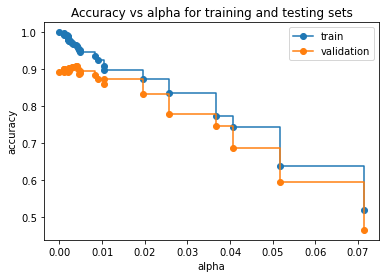

In [ ]:
train_scores = [pruned_tree.score(X_train, y_train) for pruned_tree in pruned_trees]
val_scores = [pruned_tree.score(X_val, y_val) for pruned_tree in pruned_trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
#ax.set_xlim([0,0.02])
#ax.set_ylim([0.7,1])
plt.show()

I choose the cost complexity parameter that led to the highest validation set accuracy.

In [ ]:
alpha_optimal = ccp_alphas[np.argmax(val_scores)]
print('The optimal cost complexity parameter is', alpha_optimal)

The optimal cost complexity parameter is 0.0038214837097518706


I build the final pruned tree using the optimal cost complexity. Then I use graphviz to visualize the pruned tree.

In [ ]:
pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha_optimal)
pruned_tree.fit(X_train, y_train)
print('Train Score: ', pruned_tree.score(X_train, y_train))
print('Validation Score: ', pruned_tree.score(X_val, y_val))

Train Score:  0.9664804469273743
Validation Score:  0.9096989966555183


In [ ]:
tree.export_graphviz(pruned_tree, 'pruned_tree.dot', feature_names = X.columns)
! dot -Tpng pruned_tree.dot -o pruned_tree.png

In [ ]:
# code to find the feature importance of the pruned tree
pd.DataFrame({'Feature':X_train.columns, 'Importance': pruned_tree.feature_importances_}).sort_values(by = 'Importance', ascending = False)

,Feature,Importance
24,Pop. Char. Score,0.623416
13,Pollution Burden,0.223807
23,Pop. Char.,0.086203
14,Pollution Burden Score,0.059527
18,Education,0.007046
22,Housing Burden,0.000000
21,Unemployment,0.000000
20,Poverty,0.000000
19,Linguistic Isolation,0.000000
17,Cardiovascular Disease,0.000000


In [ ]:
# some comments
# Adjusting the hyperparameters slightly reduced the complexity of the tree size, so I don't believe that it improved the
# interpretability significantly. However, pruning significanlty imiproved the interpretability of the tree by making it more concise.
# Adjusting the hyperparameters slightlly changed the order of importance of variables in the tree and also reduced the number of important
# variables. However, pruning significantly reduced the number of variables important in the tree

Next, I try a couple of ensemble methods: bagging, random forests, and boosting.





### Bagging

Here I create a bagging classifier to determine if I can get an improvement on the mean accuracy from previous models

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_tree = BaggingClassifier()
bag_tree.fit(X_train, y_train)

bag_train_score = bag_tree.score(X_train, y_train)
bag_val_score = bag_tree.score(X_val, y_val)

print('Train Score: ', bag_train_score)
print('Validation Score: ', bag_val_score)

Train Score:  0.994413407821229
Validation Score:  0.9163879598662207


Now I use the randomized parameter search to find optimal parameters for the bagging model

In [ ]:
param_dist = {'n_estimators': randint(10, 100),
              'max_samples': randint(5,700),
              'max_features': randint(5, len(X_train.columns))}

rnd_search = RandomizedSearchCV(bag_tree, param_distributions=param_dist,
                                cv=10, n_iter=50)
rnd_search.fit(X_train, y_train)

print(rnd_search.best_score_)
best_params = rnd_search.best_params_
print(rnd_search.best_params_)

0.9261922596754057
{'max_features': 14, 'max_samples': 579, 'n_estimators': 97}


Using the best parameters, I determine the mean accuracy for the training and validation data.

In [ ]:
bag_tree.set_params(max_samples=rnd_search.best_params_['max_samples'],
                    n_estimators=rnd_search.best_params_['n_estimators'],
                    max_features = rnd_search.best_params_['max_features'])

bag_train_score = bag_tree.score(X_train, y_train)
bag_val_score = bag_tree.score(X_val, y_val)

print('Train Score: ', bag_train_score)
print('Validation Score: ', bag_val_score)

Train Score:  0.994413407821229
Validation Score:  0.9163879598662207


### Random Forest





I create a RandomForestClassifier, and use `RandomizedSearchCV` to optimize the parameters using in creating the random forest classifier for predicting CES scores

In [ ]:

from sklearn.ensemble import RandomForestClassifier
param_dist = {'n_estimators': randint(10, 100),
              'max_leaf_nodes': randint(3, 100),
              'max_features': ["auto"],
              'max_depth': randint(1, 10),
              'min_samples_leaf': randint(1, 30),
              'min_samples_split': randint(2, 20)}

rf_tree = RandomForestClassifier()
rf_tree.fit(X_train, y_train)

rnd_search = RandomizedSearchCV(rf_tree, param_distributions=param_dist,
                                cv=10, n_iter=50)
rnd_search.fit(X_train, y_train)

best_params = rnd_search.best_params_

rf_tree.set_params(max_leaf_nodes=rnd_search.best_params_['max_leaf_nodes'],
                    n_estimators=rnd_search.best_params_['n_estimators'],
                    max_features = rnd_search.best_params_['max_features'],
                    max_depth=rnd_search.best_params_['max_depth'],
                    min_samples_leaf=rnd_search.best_params_['min_samples_leaf'],
                    min_samples_split=rnd_search.best_params_['min_samples_split'])

rf_train_score = rf_tree.score(X_train, y_train)
rf_val_score = rf_tree.score(X_val, y_val)

print('Train Score: ', rf_train_score)
print('Validation Score: ', rf_val_score)


Train Score:  1.0
Validation Score:  0.9163879598662207


I use RandomForestClassifier to calculate the average importance of each feature, and the standard deviation of the importance of each feature.

Feature ranking:
0. Pop. Char.  (0.209183)
1. Pop. Char. Score (0.139011)
2. Pollution Burden (0.129603)
3. Pollution Burden Score (0.101186)
4. Education (0.053418)
5. Asthma (0.042221)
6. Poverty (0.038619)
7. Linguistic Isolation (0.037886)
8. Low Birth Weight (0.024585)
9. Cardiovascular Disease (0.024422)
10. Housing Burden (0.023667)
11. PM2.5 (0.018774)
12. Solid Waste (0.017341)
13. Unemployment (0.017334)
14. Cleanup Sites (0.013996)
15. Tox. Release (0.013843)
16. Haz. Waste (0.013756)
17. Traffic (0.012976)
18. Diesel PM (0.012922)
19. Drinking Water (0.012206)
20. Total Population (0.011891)
21. Groundwater Threats (0.010506)
22. Pesticides (0.008092)
23. Ozone (0.007329)
24. Imp. Water Bodies (0.005233)


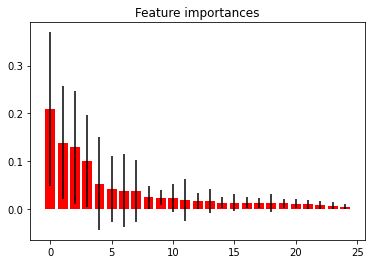

In [ ]:
importances = rf_tree.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_tree.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.show()

### Next I try Adaptive Gradient Boosting to predict the CES score


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = AdaBoostClassifier()
ada_tree.fit(X_train, y_train)

ada_train_score = ada_tree.score(X_train, y_train)
ada_val_score = ada_tree.score(X_val, y_val)

print('Train Score: ', ada_train_score)
print('Validation Score: ', ada_val_score)

Train Score:  0.5184357541899441
Validation Score:  0.46488294314381273


THe results from AdaBoost aren't very good, most likely because of noisy data or outliers well. In this case, the data is might be polarized Since I'm taking values from the top and bottom 10% -- which means it might not work as well as we want it to.



### Next I try gradient boosting for predicting the CES score. I create a GradientBoostingClassifier, using `RandomizedSearchCV` with the parameters shown in the param_dist dictionary to find the best parameter combinations or the model. The purpose of this to improve on the AsaBoost from previous cells

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'learning_rate': randint(1, 5),
              'max_leaf_nodes': randint(3, 100),
              'max_features': ['auto'],
              'max_depth': randint(1, 10),
              'min_samples_leaf': randint(1, 30)}

In [ ]:
gb_tree = GradientBoostingClassifier()
gb_tree.fit(X_train, y_train)

rnd_search = RandomizedSearchCV(gb_tree, param_distributions=param_dist,
                                cv=, n_iter=10)
rnd_search.fit(X_train, y_train)

best_params = rnd_search.best_params_

gb_tree.set_params(learning_rate=rnd_search.best_params_['learning_rate'],
                    max_leaf_nodes=rnd_search.best_params_['max_leaf_nodes'],
                    max_features = rnd_search.best_params_['max_features'],
                    max_depth=rnd_search.best_params_['max_depth'],
                    min_samples_leaf=rnd_search.best_params_['min_samples_leaf'])

GradientBoostingClassifier(learning_rate=1, max_features='auto',
                           max_leaf_nodes=52, min_samples_leaf=5)

In [ ]:
gb_train_score = gb_tree.score(X_train, y_train)
gb_val_score = gb_tree.score(X_val, y_val)

print('Train Score: ', gb_train_score)
print('Validation Score: ', gb_val_score)

Train Score:  1.0
Validation Score:  0.9130434782608695


Below I show the feature importances of the gradient boosted decision tree.

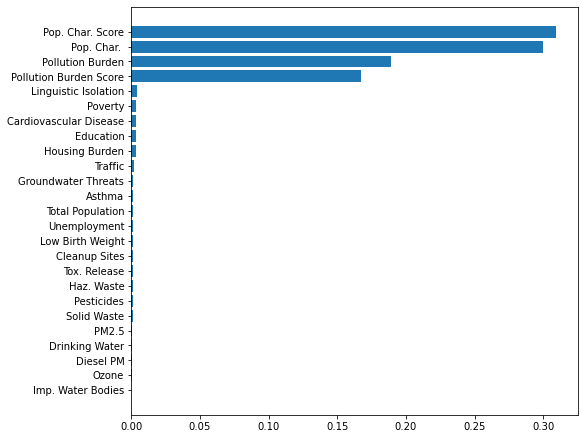

In [ ]:
feature_importance = gb_tree.feature_importances_

gb_feat = pd.DataFrame({'feature':X_train.columns, 'importance':feature_importance})
gb_feat = gb_feat.sort_values(by='importance', ascending=True)

plt.figure(figsize=(8, 7.5))
plt.barh(width=gb_feat.importance, y=gb_feat.feature);

In this project, I've gone through many methods of creating a decision tree and tuning and improving it, as well as various algorithms that use multiple trees to create a more reliable tree for prediction. Even though I've primarily have been testing our models with the training and validation sets, I test these models to see which one is the optimal one to choose given our test data and how the model performs.


In [ ]:
models = [first_tree, tuned_tree, pruned_tree, bag_tree, rf_tree, ada_tree, gb_tree]

In [ ]:
models = [first_tree, tuned_tree, pruned_tree, bag_tree, rf_tree, ada_tree, gb_tree]
model_names = ['first_tree', 'tuned_tree', 'pruned_tree', 'bag_tree', 'rf_tree', 'ada_tree', 'gb_tree']
ind = 0
for i in models:
    print('Test Score: %.3f, Model: %s'% (i.score(X_test, y_test), model_names[ind]))
    ind = ind+1

Test Score: 0.930, Model: first_tree
Test Score: 0.920, Model: tuned_tree
Test Score: 0.946, Model: pruned_tree
Test Score: 0.900, Model: bag_tree
Test Score: 0.923, Model: rf_tree
Test Score: 0.468, Model: ada_tree
Test Score: 0.930, Model: gb_tree


In [ ]:
# Some Thoughts
# I would recommend using random forest because it has comparable accuracy with the best models on test data and it has the least bias in
# determining the most important subset of features in predicting the output variable. Because it is an ensamble method, it loses some of
# it's interpretability, however the rank of features is most reliable and offers some insight into the data.
# I would look for the population with the most significant values for the most important features determined in the random forest model